# Séance 2 : Première prise en main de Qiskit

## Introduction

Nous commencerons à apprivoiser Qiskit à travers ce notebook. Celui-ci a pour objectif de devenir un document de référence (non-exhaustif) pour les prochains cours d'implémentation quantique, et bien sûr vos futurs approfondissements individuels.

A travers les méthodes des éléments Qiskit Terra et Qiskit Aer, nous verrons :

- Les objets fondamentaux ;
- Les opérations fondamentales.

A la fin du cours, vous devrez téléverser sur le Moodle votre notebook que vous aurez pris le soin de renommer sous la forme *12-10-2021 Nom Prénom*.


### Nom et prénom


Commençons par inscrire votre nom et prénom en tant qu'objet string nom_prenom. Nous utiliserons comme convention :

- Un _ séparera le nom et le prénom.

Ainsi :

- Pour Jean Philippe Arias Zapata (le tiret est une longue histoire...), nom_prenom = 'Arias Zapata_Jean Philippe ; 
- Pour Jean-Pierre Pernault, nom_prenom = 'Pernault_Jean-Pierre'.

In [1]:
nom_prenom = 'Basocak_Axel'
!pip install qiskit

**N'oubliez surtout pas d'exécuter cette variable ou vous serez noté absent et n'aurez pas de note !**


## Objets fondamentaux

Avant même de commencer à implémenter des algorithmes quantiques, il faut être bien sûr capable de représenter dans Qiskit les éléments fondamentaux qui nous seront utiles à cette fin. Dans cette partie, tous les objets et toutes les méthodes seront issues de l'élément Qiskit Terra.

Il s'agit :

- Des registres quantiques et des qubits ;
- Des registres classiques et des bits ;
- Des circuits quantiques.

### Des registres quantiques et des qubits

Les registres quantiques et les qubits sont respectivement représentés dans Qiskit par :

- Les objets de type QuantumRegister ;
- Les objets de type Qubit.

Il est important de savoir qu'un qubit ne peut être défini en-dehors d'un registre quantique. C'est le cas même pour un seul qubit qui doit s'insérer dans un registre quantique de dimension 1 (cf. *Bit et qubit (2)* des diapositives de la séance annexe d'implémentation quantique).

Pour définir un registre quantique de dimension 1, il suffit de suivre les lignes de code suivantes :

In [2]:
from qiskit.circuit import QuantumRegister, Qubit

registre_quantique_dim1 = QuantumRegister(1)

L'objet *registre_quantique_dim1* de type QuantumRegister contient un seul qubit représenté par un objet de type Qubit. Qiskit a été écrit tel que les opérations classiques sur les listes fonctionnent aussi sur les objets QuantumRegister :

In [3]:
print(len(registre_quantique_dim1) == 1)

True


In [4]:
print(type(registre_quantique_dim1[0]) == Qubit)

True


**1) A votre avis, comment définit-on un registre quantique de dimension 2 ?**

In [5]:
registre_quantique = QuantumRegister(2)
print(len(registre_quantique) == 2)

True


A partir de là, il est important de pouvoir appeler un qubit spécifique dans le registre quantique. Comme nous le disions, la syntaxe est identique à celle des listes. Pour nommer le 2ème qubit de notre registre quantique sous le nom *chat_vivant*, il suffit donc d'écrire :

In [6]:
chat_vivant = registre_quantique[1]

Une façon alternative (et plus compliquée...) de nommer un qubit est d'employer cette fois une méthode liée à l'objet Qubit :

In [7]:
from qiskit.circuit import Qubit

chat_mort = Qubit(registre_quantique, 1)

In [8]:
print(chat_vivant == chat_mort, 'Encore un coup de Schroedinger...')

True Encore un coup de Schroedinger...


### Des registres classiques et des bits

Les registres classiques et les bits sont respectivement représentés dans Qiskit par :

- Les objets de type ClassicalRegister ;
- Les objets de type Clbit.

Idem, nous définissons un registre classique de la manière suivante :

In [9]:
from qiskit.circuit import ClassicalRegister, Clbit

registre_classique_dim1 = ClassicalRegister(1)

Tout ce qui a été dit auparavant est aussi vrai pour les objets de type ClassicalRegister et Clbit.

**1) Vérifiez que le registre classique est de dimension 1.**

In [10]:
print(len(registre_quantique_dim1) == 1)

True


Tout est ce qui a été dit auparavant fonctionne pour les bits classiques :

In [11]:
print(type(registre_classique_dim1[0]) == Clbit)

True


**2) Vérifiez autrement que l'élément dans le registre classique est bien un objet de type Clbit.**

In [12]:
print(type(registre_classique_dim1[0]) == Clbit)

True


**3) Nommez le bit classique contenu dans le registre classique** *clbit* :

In [13]:
clbit = registre_classique_dim1[0]

**4) Est-ce que la méthode alternative fonctionne pour les objets de type Clbit ?**

In [14]:
from qiskit.circuit import Clbit

shannon = Clbit(registre_classique_dim1,0)

In [15]:
print(clbit == shannon)

True


### Des circuits quantiques

Les circuits quantiques sont les figures que vous connaissez déjà qui représentent des qubits, des bits et des opérations fondamentales sur ces qubits et bits.

Ils sont représentés sur Qiskit comme des objets de type QuantumCircuit. Nous pouvons les définir à partir d'objets de type QuantumRegister et ClassicalRegister :

In [16]:
from qiskit.circuit import QuantumCircuit

qr = registre_quantique_dim1
cr = registre_classique_dim1

circuit_quantique = QuantumCircuit(qr, cr)

Il est possible de définir un circuit quantique en précisant directement les dimensions respectives de son registre quantique et de son registre classique : 

In [17]:
num_qubits = 1
num_clbits = 1

circuit_quantique = QuantumCircuit(num_qubits, num_clbits)

Cela nous donnera comme circuit quantique :



Nous pouvons obtenir le nombre respectif de qubits et de bits classiques à partir des méthodes suivantes :

In [18]:
circuit_quantique.num_qubits #si cela ne fonctionne pas, tentez n_qubits (cela dépend des versions)

1

In [19]:
circuit_quantique.num_clbits# si cela ne fonctionne pas, tentez n_clbits (cela dépend des versions)
# il est possible que cela ne fonctionne pas du tout, mais vous saurez vous débrouiller plus tard!

1

Nous pouvons aussi obtenir les qubits et bits classiques du circuit quantique. Nous obtiendrons une *liste d'objets respectivement de type Qubit et Clbit* à partir des méthodes suivantes :

In [20]:
qubits = circuit_quantique.qubits

In [21]:
clbits = circuit_quantique.clbits

Cela ne changera rien pour nos opérations.

Même après avoir construit un circuit quantique, il est possible de rajouter un registre quantique :

In [22]:
circuit_quantique.add_register(registre_quantique)

**1) Récupérez le nombre de qubits de** *circuit_quantique* **à partir de la méthode précédemment présentée.**

In [23]:
n = len(circuit_quantique.qubits)

In [24]:
assert n == len(qr) + len(registre_quantique)

### Exercice

Contrairement au précédent notebook, il n'y aura pas besoin de créer de méthode pour résoudre l'exercice.

**1) Créez deux registres quantiques** *qr1 et qr2* **respectivement de dimension 1 et 2.**

In [25]:
n1 = 1
n2 = 2

qr1 = QuantumRegister(n1)
qr2 = QuantumRegister(n2)

In [26]:
assert type(qr1) == QuantumRegister and len(qr1) == 1
assert type(qr2) == QuantumRegister and len(qr2) == 2

**2) Créez un circuit quantique** *qc* **contenant le registre quantique** *qr1*.

In [27]:
qc = QuantumCircuit(qr1)

In [28]:
assert qc.qubits == list(qr1)

Nous pouvons visualiser notre circuit quantique *qc* à partir de la méthode suivante :

In [29]:
!pip install pylatexenc
qc.draw(output='mpl')

**3) Rajoutez maintenant le registre quantique** *qr2* **au circuit quantique** *qc*. 

In [30]:
qc.add_register(qr2)

In [31]:
for qubit in qr2:
    assert qubit in qc.qubits

**4) Récupérez la liste** *q* **des qubits de qc.**

In [32]:
q =qc.qubits

In [33]:
assert len(q) == 3

**5) Rajoutez un registre classique de dimension 3 au circuit quantique** *qc*.

In [34]:
qc.add_register(ClassicalRegister(3))

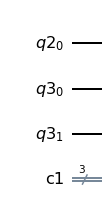

In [35]:
assert len(qc.clbits) == 3
qc.draw(output='mpl')

## Les opérations fondamentales

Nous sommes maintenant prêts à faire agir des opérations sur nos circuits quantiques.

Celles-ci sont de deux types :

- Les portes quantiques ;
- Les mesures.

Dans cette partie, nous aurons besoin de méthodes de Qiskit Terra et de Qiskit Aer.

### Les portes quantiques

Nous ne serons évidemment pas exhaustif dans cette section. Nous nous intéresserons plus particulièrement aux portes quantiques suivantes :

- $X$, $H$, $R_y(\theta)$ et $U3(\theta, \phi, \lambda)$ agissant sur un seul qubit ;
- $CNOT$ agissant sur deux qubits.

Nous insistons une nouvelle fois sur le fait que ce n'est pas un cours d'algorithmie quantique. Ainsi, nous ne montrerons pas comment sont représentés matriciellement les portes quantiques que nous utiliserons.

Les portes quantiques basiques sont directement intégrées à Qiskit Terra. La syntaxe pour les appeler est toujours la même. Il faut préciser le circuit quantique dans lequel intégrer la porte quantique, sur quel(s) qubit(s) il va agir et le cas échéant, les paramètres qui sont nécessaires.

Supposons un circuit quantique nommé *exemple_circ* avec un seul registre quantique *exemple_qr* de dimension 2 (ne faites pas attention au bit classique dans l'image suivante). 



Ainsi avec la ligne de code suivante,

In [36]:
#exemple_circ = QuantumCircuit(QuantumRegister(2))
exemple_circ.x(0)

NameError: name 'exemple_circ' is not defined

nous sommes en train d'intégrer la porte $X$ au circuit quantique *exemple_circ*, et celle-ci agit sur le premier qubit (le premier objet de type Qubit). Une manière alternative de faire la même chose est d'écrire :

In [37]:
exemple_circ.x(exemple_qr[0]) 

NameError: name 'exemple_circ' is not defined

ou encore,

In [38]:
exemple_q = exemple_circ.qubits

exemple_circ.x(exemple_q[0])

NameError: name 'exemple_circ' is not defined

Nous constatons que si nous donnons un objet de type QuantumRegister ou une liste d'objets de type Qubit ou encore l'indice du qubit, rien ne change pour la méthode intégrée.

*Il faut savoir que les méthodes sont cumulatives !* Faire agir la méthode une première fois puis une seconde fois sur le même qubit nous donnera ceci :



Supposons que nous avons redéfini notre circuit *exemple_circ* tel qu'il soit sans aucune opération quantique. Si jamais nous voulons faire agir la porte $X$ sur plusieurs qubits de *circ*, il y a plusieurs possibilités. Par exemple, si nous souhaitons le faire sur les deux premiers qubits,

In [39]:
exemple_circ.x(exemple_q[0])
exemple_circ.x(exemple_q[1])

NameError: name 'exemple_circ' is not defined

ou encore,

In [40]:
exemple_circ.x(range(2))

NameError: name 'exemple_circ' is not defined

ou encore,

In [41]:
exemple_circ.x(exemple_qr)

NameError: name 'exemple_circ' is not defined

ou finalement,

In [42]:
exemple_circ.x(exemple_q[0:2])

NameError: name 'exemple_circ' is not defined

etc.

Ceci nous donne :

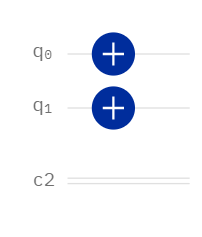

Sachez que je ne vous demande pas d'apprendre toutes les façons alternatives d'appliquer une porte quantique basique. Je voulais simplement que vous sachiez que ça existe. Si vous en avez besoin dans le futur, vous pourrez toujours vous référer à ce document. En attendant, choisissez la ou les méthodes qui vous plaisent le plus !

A partir de maintenant, je choisis arbitrairement une façon de faire. Pour intégrer une porte de Hadamard $H$ dans le circuit quantique agissant sur le premier qubit, il suffit d'écrire :

In [43]:
exemple_circ.h(exemple_qr[0])

NameError: name 'exemple_circ' is not defined

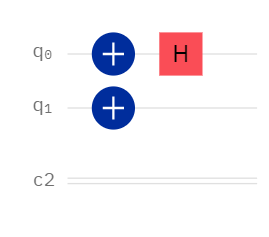

Pour une porte quantique $R_y(\theta)$ représentant une rotation selon l'axe $y$ d'angle $\theta$ agissant sur le second qubit :

In [44]:
theta = 0

exemple_circ.ry(theta, exemple_qr[1])

NameError: name 'exemple_circ' is not defined



Pour une porte quantique générale $U3(\theta, \phi, \lambda)$ de paramètres $\theta$, $\phi$ et $\lambda$ agissant sur le premier qubit :

In [45]:
theta = 0
phi = 0
lambd = 0

exemple_circ.u3(theta, phi, lambd, exemple_qr[0])

NameError: name 'exemple_circ' is not defined

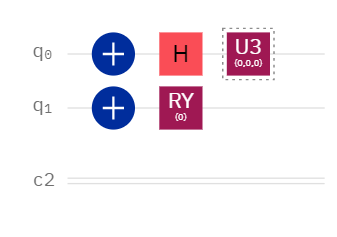

Pour la porte $CNOT$ qui agit sur deux qubits, il faut maintenant préciser quel est le qubit de contrôle, i. e. le qubit dont l'action du $X$ dépend de son état, et quel est le qubit-cible, i. e. le qubit sur lequel le $X$ peut agir. La syntaxe est la suivante :

In [46]:
exemple_circ.cx(qubit_controle, qubit_cible)

NameError: name 'exemple_circ' is not defined

### Les mesures

Cette section sur les mesures peut être décomposée en deux :

- L'intégration de l'opération *mesure* dans le circuit quantique (Qiskit Terra) ;
- La récolte des résultats (Qiskit Aer).

Il est nécessaire d'avoir des bits classiques dans son circuit quantique pour pouvoir appliquer l'opération mesure.

Plus précisément, pour chaque qubit mesuré, il faudra un bit classique associé.

**1) Créez un circuit quantique** *circ* **ayant un registre quantique** *q* **de dimension 2 et avec un registre classique** *c* **de dimension nécessaire pour mesurer tous les qubits en jeu.**

In [47]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circ = QuantumCircuit(q,c)

In [48]:
assert len(q) == 2
assert len(c) == len(q)

Pour pouvoir mesurer le premier qubit et associer sa valeur au premier bit, il suffit d'écrire :

In [49]:
circ.measure(q[0], c[0])

Visualisons notre circuit quantique :

In [50]:
circ.draw(output='mpl')

Nous voulons maintenant récolter les résultats de la mesure. Nous aurons cette fois besoin de l'élément Qiskit Aer qui s'occupe d'émuler les circuits quantiques. Nous irons plus en profondeur lors de la prochaine séance.

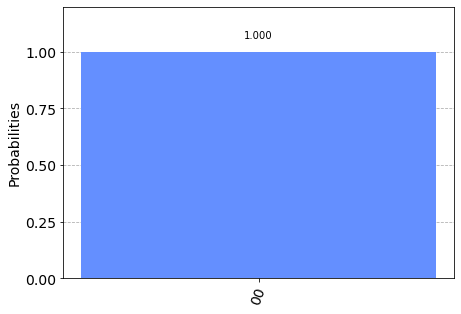

In [51]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')

job = execute(circ, simulator, shots=1000)

result = job.result()

qiskit_mesures = result.get_counts(circ)

plot_histogram(qiskit_mesures)

Après émulation, nous constatons que nous n'avons que l'état |00> après mesure alors que nous n'avons fait agir aucune porte quantique. Autrement dit, par convention, les qubits sont initialement à l'état |0> .

### Exercice final

L'objectif de cet exercice final est de créer un état intriqué nommé état de Bell (il y en a plusieurs). Pour cela, nous allons créer le circuit quantique suivant :



*Attention : le i-ème qubit est bien associé au i-ème clbit !*

**1) Créez un circuit quantique** *circ_final* **composé d'un registre quantique de dimension 2** *qr_final* **et d'un registre classique de dimension 2** *cr_final*.

In [52]:
qr_final =QuantumRegister(2)
cr_final =ClassicalRegister(2)
circ_final = QuantumCircuit(qr_final,cr_final)

In [53]:
for qubit in qr_final:
    assert qubit in circ_final.qubits

for clbit in cr_final:
    assert clbit in circ_final.clbits

**2) Faites agir dans l'ordre :**

- **une porte de Hadamard** $H$ **sur le premier qubit ;**
- **un** $CNOT$ **avec pour qubit de contrôle le premier qubit et pour qubit-cible le second qubit.**

In [54]:
circ_final.h(qr_final[0])
circ_final.cx(qr_final[0], qr_final[1])

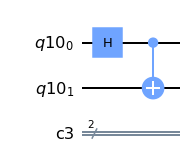

In [55]:
circ_final.draw(output='mpl')

**3) Rajoutez les mesures.**

In [56]:
circ_final.measure(qr_final, cr_final)

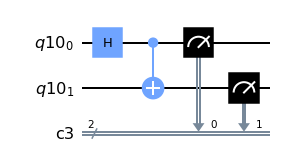

In [57]:
circ_final.draw(output='mpl')

A ce niveau-là, vous devriez obtenir la figure présentée au début de l'exercice. Bravo, vous avez fait votre première intrication ! Pour en avoir le coeur net, nous allons exécuter notre circuit quantique dans l'émulateur *qasm_simulator* et regarder l'histogramme en sortie.

In [58]:
shots = 8096

job_final = execute(circ_final, simulator, shots=shots)

mesures_final = job_final.result().get_counts(circ_final)
print(mesures_final)

{'11': 4038, '00': 4058}


In [59]:
from math import isclose
assert isclose(mesures_final['00'], shots/2, rel_tol=0.2) and isclose(mesures_final['11'], shots/2, rel_tol=0.2)

Traçons l'histogramme associé :

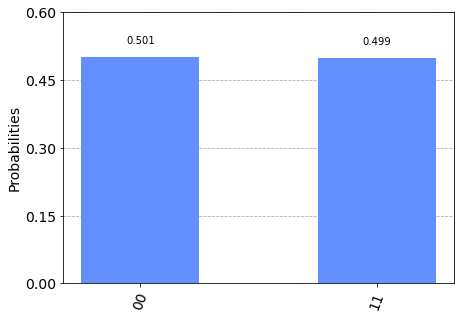

In [60]:
plot_histogram(mesures_final)